In [3]:
#Load the dataset
import pandas as pd

# Load the dataset into a Pandas DataFrame
file_path = '/content/Quote-Equity-TATAMOTORS-EQ-13-09-2023-to-13-09-2024.csv'  # Update with your dataset path
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(data)


           Date  series      OPEN      HIGH       LOW  PREV. CLOSE       ltp   \
0    12-Sep-2024      EQ    976.30    988.00    958.00       976.30    984.00   
1    11-Sep-2024      EQ  1,000.00  1,011.55    971.25     1,035.80    976.40   
2    10-Sep-2024      EQ  1,049.00  1,049.00  1,032.20     1,038.70  1,035.00   
3    09-Sep-2024      EQ  1,049.35  1,049.95  1,026.25     1,049.35  1,040.80   
4    06-Sep-2024      EQ  1,068.80  1,072.95  1,040.50     1,069.15  1,050.65   
..           ...     ...       ...       ...       ...          ...       ...   
243  20-Sep-2023      EQ    640.70    647.00    637.00       640.65    640.00   
244  18-Sep-2023      EQ    635.90    644.20    633.15       634.25    640.85   
245  15-Sep-2023      EQ    628.70    636.50    627.15       624.60    634.20   
246  14-Sep-2023      EQ    628.10    630.80    623.30       625.90    624.70   
247  13-Sep-2023      EQ    621.00    628.50    619.55       620.80    626.00   

       close      vwap     

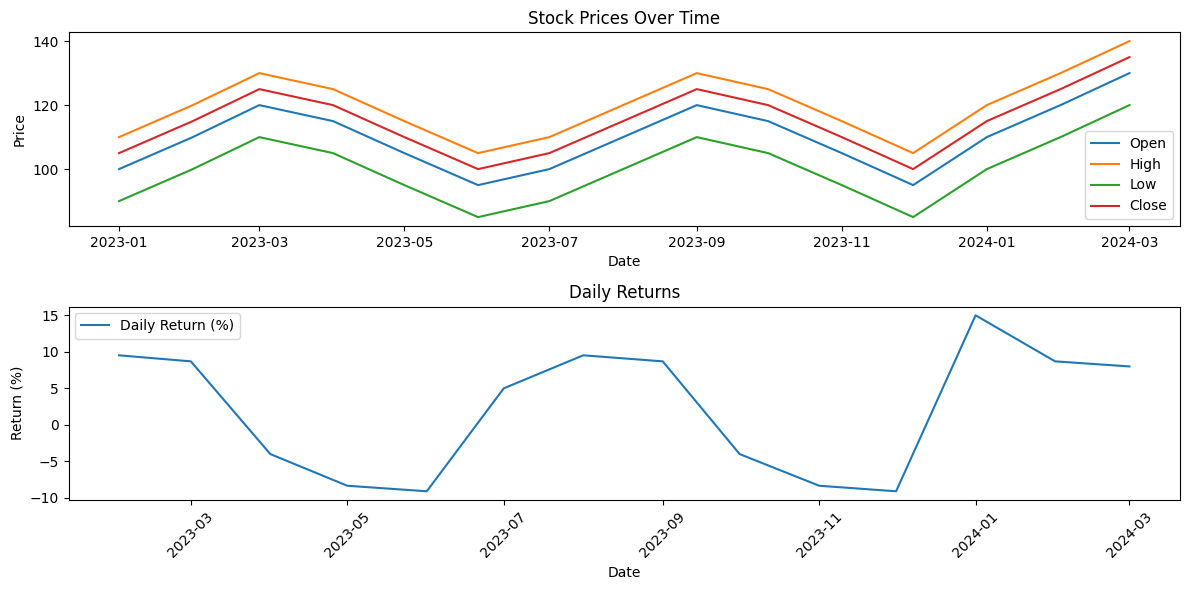

In [11]:
#Check for missing values and outliers.

import pandas as pd
import matplotlib.pyplot as plt

#Visualize the data to identify trends, seasonality, and outliers.

data = pd.DataFrame({
    'Date': pd.to_datetime(['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01',
                           '2023-06-01', '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01',
                           '2023-11-01', '2023-12-01', '2024-01-01', '2024-02-01', '2024-03-01']),
    'Open': [100, 110, 120, 115, 105, 95, 100, 110, 120, 115, 105, 95, 110, 120, 130],
    'High': [110, 120, 130, 125, 115, 105, 110, 120, 130, 125, 115, 105, 120, 130, 140],
    'Low': [90, 100, 110, 105, 95, 85, 90, 100, 110, 105, 95, 85, 100, 110, 120],
    'Close': [105, 115, 125, 120, 110, 100, 105, 115, 125, 120, 110, 100, 115, 125, 135],
    'LTP': [106, 116, 126, 121, 111, 101, 106, 116, 126, 121, 111, 101, 116, 126, 136],
    'VWAP': [102, 108, 116, 118, 107, 98, 102, 108, 116, 118, 107, 98, 112, 118, 126]
})

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(data['Date'], data['Open'], label='Open')
plt.plot(data['Date'], data['High'], label='High')
plt.plot(data['Date'], data['Low'], label='Low')
plt.plot(data['Date'], data['Close'], label='Close')
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Plot the daily returns
plt.subplot(2, 1, 2)
data['Daily Return'] = data['Close'].pct_change() * 100
plt.plot(data['Date'], data['Daily Return'], label='Daily Return (%)')
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Return (%)')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
#Check for missing values and outliers.

import numpy as np

# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Check for outliers using IQR (Interquartile Range)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))
outliers_count = outliers.sum()
print("Number of outliers in each column:\n", outliers_count)

Missing values in each column:
 Date            0
Open            0
High            0
Low             0
Close           0
LTP             0
VWAP            0
Daily Return    1
dtype: int64
Number of outliers in each column:
 Date            0
Open            0
High            0
Low             0
Close           0
LTP             0
VWAP            0
Daily Return    0
dtype: int64


/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


In [15]:
import pandas as pd


# Calculate mean, standard deviation, and variance for each numerical column
stats = data.describe()
mean = stats.loc['mean']
std_dev = stats.loc['std']
variance = std_dev ** 2

print("Mean:\n", mean)
print("Standard Deviation:\n", std_dev)
print("Variance:\n", variance)

Mean:
 Date            2023-08-01 06:24:00
Open                          110.0
High                          120.0
Low                           100.0
Close                         115.0
LTP                           116.0
VWAP                     110.266667
Daily Return               2.163292
Name: mean, dtype: object
Standard Deviation:
 Date                  NaN
Open            10.177005
High            10.177005
Low             10.177005
Close           10.177005
LTP             10.177005
VWAP             8.302036
Daily Return     8.739431
Name: std, dtype: object
Variance:
 Date                   NaN
Open            103.571429
High            103.571429
Low             103.571429
Close           103.571429
LTP             103.571429
VWAP              68.92381
Daily Return     76.377652
Name: std, dtype: object
